In [23]:
import os
import charts_function_list, date_functions
import datetime as dt
from dateutil.relativedelta import relativedelta
from datetime import datetime, timedelta
from calendar import isleap

In [2]:
_, data, outputs = charts_function_list.folder_setup()

In [319]:
os.chdir(data)
statehood = pd.read_csv('statehood.csv')

In [320]:
statehood = statehood[1:].reset_index(drop=True)

In [397]:
statehood['State']

state_recode={'delaware':'DE','pennsylvania':'PA','new jersey':'NJ',
'georgia':'GA','connecticut':'CT','massachusetts':'MA','maryland':'MD',
'south carolina':'SC','new hampshire':'NH','virginia':'VA','new york':'NY','north carolina':'NC','rhode island':'RI',
             'arkansas':'AR','west virginia':'WV','idaho':'ID','wyoming':'WY'}

statehood['Abbreviation']=statehood['State'].str.lower().map(state_recode).fillna('')

In [321]:
statehood['Date Admitted'] = pd.to_datetime(statehood['Date Admitted'])
def date_as_float(dt_):
        size_of_day = 1. / 366.
        size_of_second = size_of_day / (24. * 60. * 60.)
        days_from_jan1 = dt_ - datetime(dt_.year, 1, 1)
        if not isleap(dt_.year) and days_from_jan1.days >= 31+28:
            days_from_jan1 += timedelta(1)
        return days_from_jan1.days * size_of_day + days_from_jan1.seconds * size_of_second
    

statehood['Month Fraction']=statehood['Date Admitted'].apply(date_as_float)

In [365]:
#color formatting
#SD formula but in relation to 4th of July
relation_to_foj = (((statehood['Month Fraction']-date_as_float(pd.to_datetime('7/4/1776')))**2).sum())/51
statehood['Score']=((statehood['Month Fraction']-date_as_float(pd.to_datetime('7/4/1776')))/relation_to_foj)


def score_recode(df):
    if df['Score']>=2:
        return '#ca0020'
    elif df['Score']>1:
        return '#f4a582'
    elif df['Score']>-1:
        return '#f7f7f7'
    elif df['Score']>-2:
        return '#92c5de'
    else:
        return '#0571b0'
    
statehood['Color']=statehood.apply(score_recode,axis=1)

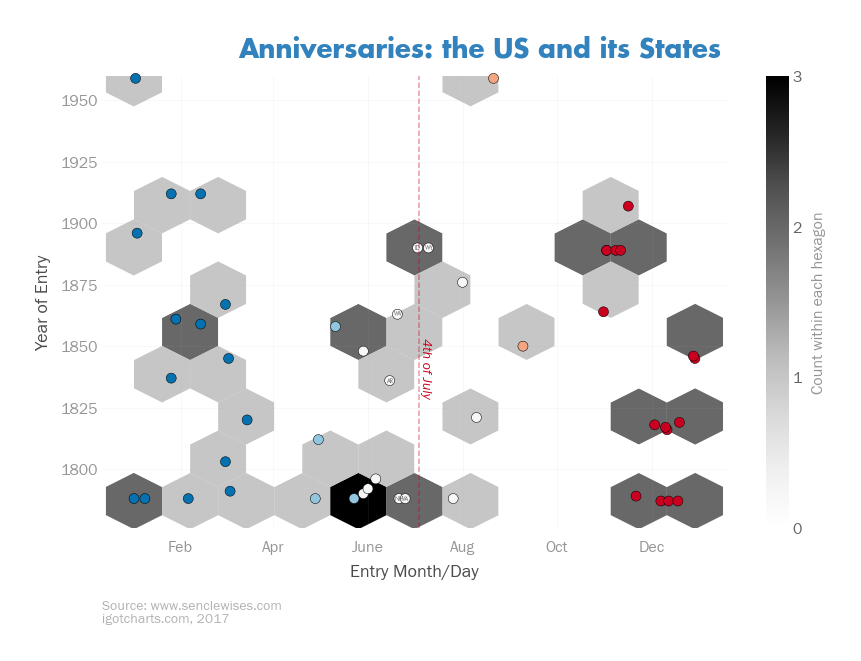

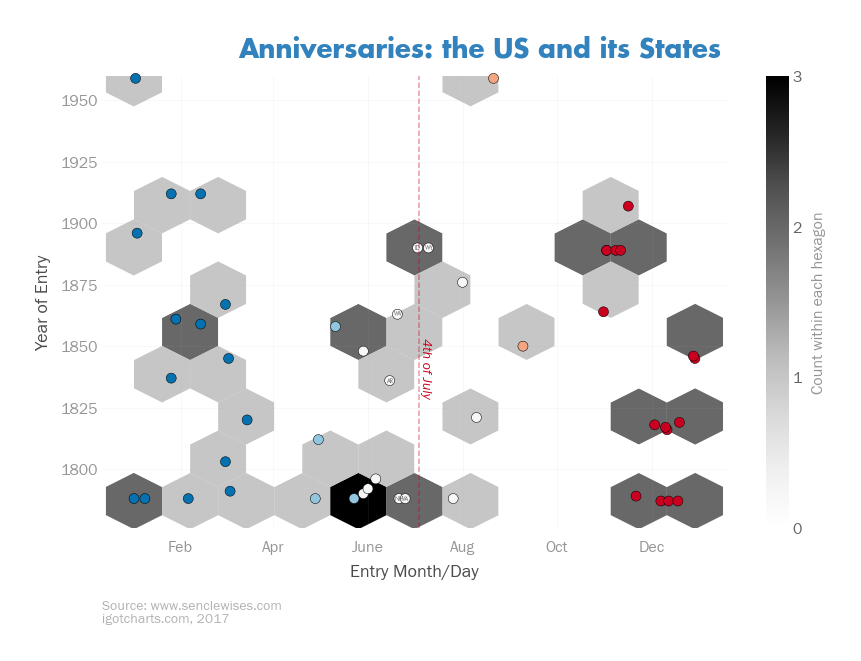

In [408]:
my_chart = charts_function_list.chart_maker(title='Anniversaries: the US and its States')
fig = my_chart.initial_fig_axis((14,8))
fig.suptitle(my_chart.title,color='#3182bd',size=26,fontname='Futura-Bold')
fig.subplots_adjust(top=.91)
ax = my_chart.axes_set_up(fig)
ax.scatter(statehood['Month Fraction'],statehood['Year'],color=statehood['Color'],zorder=2,alpha=1,clip_on=False,linewidth=.5,s=100,edgecolors='black')
plt.hexbin(statehood['Month Fraction'],statehood['Year'],gridsize=10,cmap='Greys',zorder=1,linewidths=.1)
cb = plt.colorbar()
cb.set_label('Count within each hexagon',fontsize=16,color='#969696')
cb.ax.set_yticklabels([0,'',1,'',2,'',3],fontsize=16,color='#636363')

ax.vlines(x=0.505464480874317,ymin=1776,ymax=1960,linestyles='--',color='#ca0020',alpha=.4)
ax.set_ylim(1776,1960)
ax.set_ylabel('Year of Entry',fontsize=18,alpha=.7)
ax.set_xlabel('Entry Month/Day',fontsize=18,alpha=.7)
ax.set_xticks([date_as_float(pd.to_datetime(str(x)+'-1-2015'))for x in [2,4,6,8,10,12]])
ax.set_xticklabels(['Feb','Apr','June','Aug','Oct','Dec'],position=(.5,-.02))
ax.text(.507,1850,'4th of July',style='italic',color='#ca0020',rotation=-90,fontsize=14)
my_chart.citations(ax,source=statehood.columns[6],source_y=-.18,chart_tag_y=-.21,chart_tag='igotcharts.com, 2017',color='black',alpha=.3)

for item in label_value:
    ax.text(statehood['Month Fraction'][item],statehood['Year'][item],
            statehood['Abbreviation'][item],color='black',alpha=.6,fontsize=6,ha='center',va='center',fontname='Futura Bk BT')
    
my_chart.tick_params_(ax)
os.chdir(outputs)
plt.show()

In [378]:
label_value = statehood[(statehood['Score']>=-.5)&(statehood['Score']<=.5)].index

In [401]:
import matplotlib.font_manager
set([f.name for f in matplotlib.font_manager.fontManager.ttflist])

{'AR BERKLEY',
 'AR BLANCA',
 'AR BONNIE',
 'AR CARTER',
 'AR CENA',
 'AR CHRISTY',
 'AR DARLING',
 'AR DECODE',
 'AR DELANEY',
 'AR DESTINE',
 'AR ESSENCE',
 'AR HERMANN',
 'AR JULIAN',
 'Adventure',
 'Agency FB',
 'Algerian',
 'Arial',
 'Arial Rounded MT Bold',
 'Arial Unicode MS',
 'Baskerville Old Face',
 'Bauhaus 93',
 'Bell MT',
 'Berlin Sans FB',
 'Berlin Sans FB Demi',
 'Bernard MT Condensed',
 'Blackadder ITC',
 'Bodoni MT',
 'Book Antiqua',
 'Bookman Old Style',
 'Bookshelf Symbol 7',
 'Bradley Hand ITC',
 'Britannic Bold',
 'Broadway',
 'Brush Script MT',
 'Calibri',
 'Californian FB',
 'Calisto MT',
 'Cambria',
 'Candara',
 'Castellar',
 'Centaur',
 'Century',
 'Century Gothic',
 'Century Schoolbook',
 'Chiller',
 'Colonna MT',
 'Comic Sans MS',
 'Consolas',
 'Constantia',
 'Cooper Black',
 'Copperplate Gothic Bold',
 'Copperplate Gothic Light',
 'Corbel',
 'Courier New',
 'Curlz MT',
 'DejaVu Sans',
 'DejaVu Sans Display',
 'DejaVu Sans Mono',
 'DejaVu Serif',
 'DejaVu Ser